======= Basic Statistics =======
Total Startups: 634
Funded Startups: 359
Average Funding (₹): 41.46



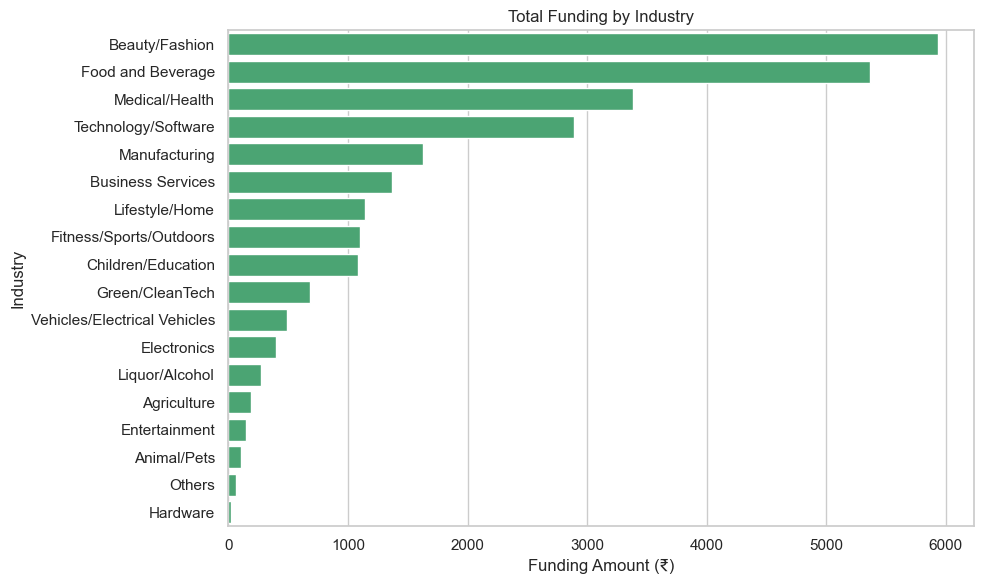

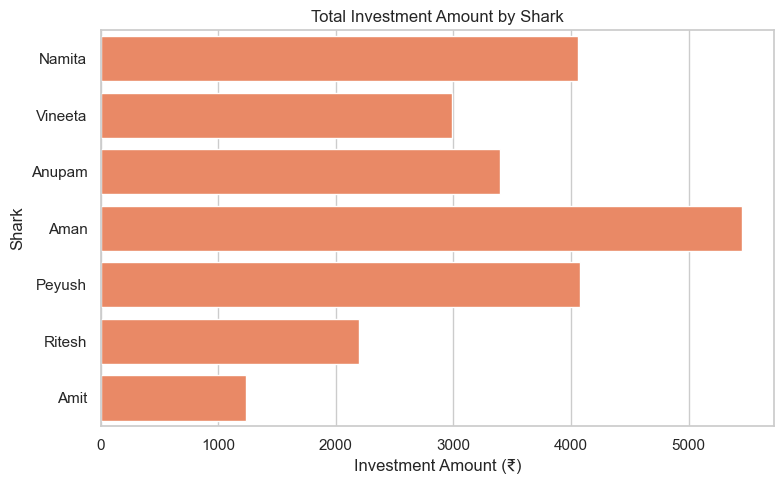

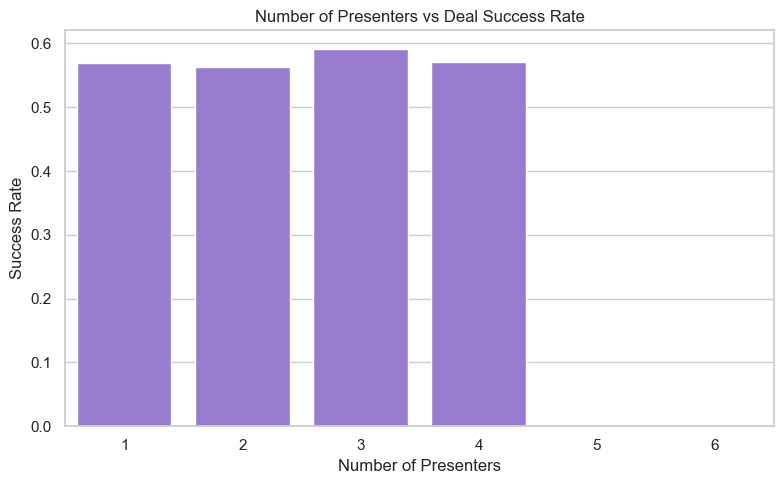

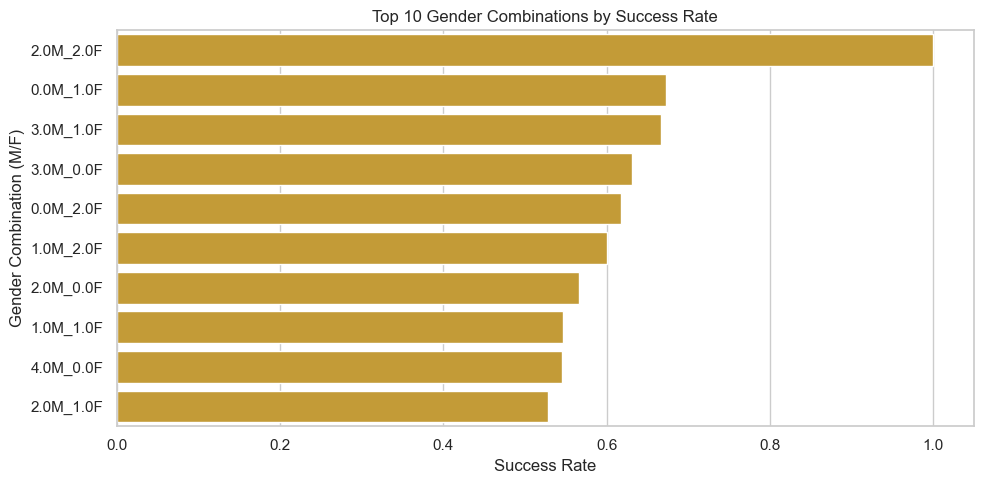

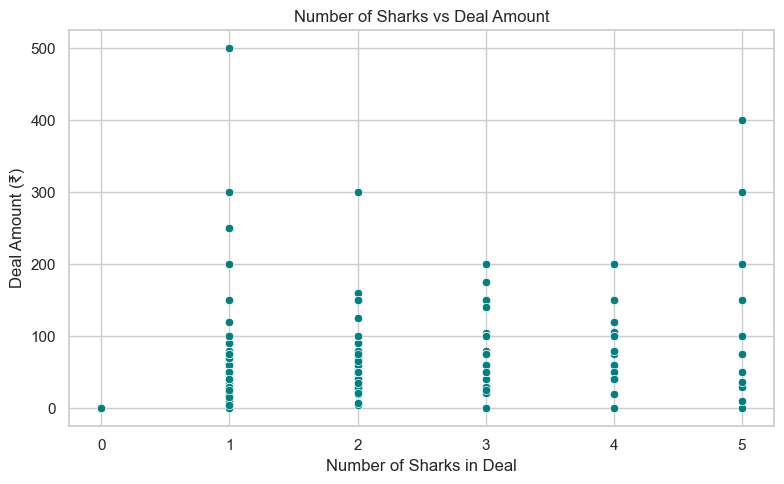


✅ Cleaned dataset saved as 'sharktank_cleaned.csv'

======= Key Insights =======
Top Funded Industry: Beauty/Fashion with ₹5,938.00
Top Investor: Aman with total investment ₹5,453.72
Top Founder Success Pattern: See 'founder_success.png' and 'gender_success.png' charts


In [22]:
# ==========================================
# Shark Tank India: Startup Investment Analysis
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# =========================
# Step 1: Load Dataset
# =========================
df = pd.read_csv("tank.csv")

# Strip any extra spaces in column names
df.columns = df.columns.str.strip()

# =========================
# Step 2: Data Cleaning
# =========================
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna("Unknown")
    else:
        df[col] = df[col].fillna(0)

# =========================
# Step 3: Safe Numeric Conversion
# =========================
numeric_cols = [
    'Total Deal Amount', 'Deal Valuation', 'Yearly Revenue', 'Monthly Sales',
    'Gross Margin', 'Net Margin', 'EBITDA', 'Cash Burn'
]

for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace("₹","", regex=False).str.replace(",","", regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# =========================
# Step 4: Basic Statistics
# =========================
total_startups = len(df)
funded_startups = (df['Total Deal Amount'] > 0).sum()
avg_funding = df['Total Deal Amount'].mean()

print("======= Basic Statistics =======")
print(f"Total Startups: {total_startups}")
print(f"Funded Startups: {funded_startups}")
print(f"Average Funding (₹): {avg_funding:,.2f}\n")

# Add funded column for further analysis
df['Funded'] = df['Total Deal Amount'] > 0

# =========================
# Step 5: Industry-wise Funding Analysis
# =========================
if 'Industry' in df.columns:
    industry_funding = df.groupby('Industry')['Total Deal Amount'].sum().sort_values(ascending=False)
    plt.figure(figsize=(10,6))
    sns.barplot(x=industry_funding.values, y=industry_funding.index, color="mediumseagreen")
    plt.title("Total Funding by Industry")
    plt.xlabel("Funding Amount (₹)")
    plt.ylabel("Industry")
    plt.tight_layout()
    plt.savefig("industry_funding.png")
    plt.show()

# =========================
# Step 6: Shark-wise Investment Analysis
# =========================
sharks = [
    'Namita Investment Amount', 'Vineeta Investment Amount', 'Anupam Investment Amount',
    'Aman Investment Amount', 'Peyush Investment Amount', 'Ritesh Investment Amount',
    'Amit Investment Amount'
]

shark_totals = {}
for shark in sharks:
    if shark in df.columns:
        shark_totals[shark.replace(' Investment Amount','')] = df[shark].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=list(shark_totals.values()), y=list(shark_totals.keys()), color="coral")
plt.title("Total Investment Amount by Shark")
plt.xlabel("Investment Amount (₹)")
plt.ylabel("Shark")
plt.tight_layout()
plt.savefig("shark_investments.png")
plt.show()

# =========================
# Step 7: Founder Success Patterns
# =========================
# By Number of Presenters
if 'Number of Presenters' in df.columns:
    founder_success = df.groupby('Number of Presenters')['Funded'].mean().sort_index()
    plt.figure(figsize=(8,5))
    sns.barplot(x=founder_success.index, y=founder_success.values, color="mediumpurple")
    plt.title("Number of Presenters vs Deal Success Rate")
    plt.xlabel("Number of Presenters")
    plt.ylabel("Success Rate")
    plt.tight_layout()
    plt.savefig("founder_success.png")
    plt.show()

# By Gender Combination
if 'Male Presenters' in df.columns and 'Female Presenters' in df.columns:
    df['Gender Combo'] = df['Male Presenters'].astype(str) + "M_" + df['Female Presenters'].astype(str) + "F"
    gender_success = df.groupby('Gender Combo')['Funded'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=gender_success.values, y=gender_success.index, color="goldenrod")
    plt.title("Top 10 Gender Combinations by Success Rate")
    plt.xlabel("Success Rate")
    plt.ylabel("Gender Combination (M/F)")
    plt.tight_layout()
    plt.savefig("gender_success.png")
    plt.show()

# =========================
# Step 8: Number of Sharks vs Deal Amount
# =========================
if 'Number of Sharks in Deal' in df.columns and 'Total Deal Amount' in df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='Number of Sharks in Deal', y='Total Deal Amount', data=df, color="teal")
    plt.title("Number of Sharks vs Deal Amount")
    plt.xlabel("Number of Sharks in Deal")
    plt.ylabel("Deal Amount (₹)")
    plt.tight_layout()
    plt.savefig("sharks_vs_amount.png")
    plt.show()

# =========================
# Step 9: Export Cleaned Dataset
# =========================
df.to_csv("tank", index=False)
print("\n✅ Cleaned dataset saved as 'sharktank_cleaned.csv'")

# =========================
# Step 10: Summary Insights
# =========================
print("\n======= Key Insights =======")
if 'Industry' in df.columns:
    print(f"Top Funded Industry: {industry_funding.index[0]} with ₹{industry_funding.values[0]:,.2f}")
if shark_totals:
    top_shark = max(shark_totals, key=shark_totals.get)
    print(f"Top Investor: {top_shark} with total investment ₹{shark_totals[top_shark]:,.2f}")
print("Top Founder Success Pattern: See 'founder_success.png' and 'gender_success.png' charts")


In [24]:
from fpdf import FPDF

pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", "B", 16)
pdf.cell(0, 10, "Shark Tank India Startup Investment Analysis", ln=True, align="C")

pdf.set_font("Arial", "", 12)
pdf.ln(10)
pdf.multi_cell(0, 8, "Objective:\nAnalyze startup investment trends using Shark Tank India dataset.")

# Add images
pdf.ln(5)
pdf.image("industry_funding.png", w=180)
pdf.ln(5)
pdf.image("shark_investments.png", w=180)

# Save PDF
pdf.output("SharkTank_Analysis_Report.pdf")
print("✅ PDF report generated")


✅ PDF report generated


In [26]:
from pptx import Presentation
from pptx.util import Inches

prs = Presentation()
slide_layout = prs.slide_layouts[0]  # Title Slide

# Title Slide
slide = prs.slides.add_slide(slide_layout)
slide.shapes.title.text = "Shark Tank India Startup Investment Analysis"
slide.placeholders[1].text = "Prepared by: Your Name\nDate: 15/10/2025"

# Add a slide for charts
slide_layout = prs.slide_layouts[5]  # Title and Content
slide = prs.slides.add_slide(slide_layout)
slide.shapes.title.text = "Industry-wise Funding"
slide.shapes.add_picture("industry_funding.png", Inches(1), Inches(2), width=Inches(8))

# Save Presentation
prs.save("SharkTank_Analysis_Presentation.pptx")
print("✅ Presentation created successfully")


✅ Presentation created successfully
